In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [223]:
test = pd.read_csv("../data/titanic/raw/test.csv")
train = pd.read_csv("../data/titanic/raw/train.csv")

In [224]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [225]:
# we can see that ticket should be and int but is it worth is to convert it to int, is it trurly a number?
# we can see that accept that the data format is correct
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [226]:
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [227]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [228]:
# rows, col
train.shape

(891, 12)

In [229]:
# What columns will give as any value, or what column will be unimportant for sure
# I bet we can drop the name without loss
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [230]:
# If we apply any chage to any of the df we need to chagne both as they need to be transformed in the same way
train.drop(columns=["Name"], inplace=True)
test.drop(columns=["Name"], inplace=True)
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [231]:
# handling missing data
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [232]:
# I have no idea what is the cabin and dataset description does not help so i will remove it
train.drop(columns="Cabin", inplace=True)
test.drop(columns="Cabin", inplace=True)
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


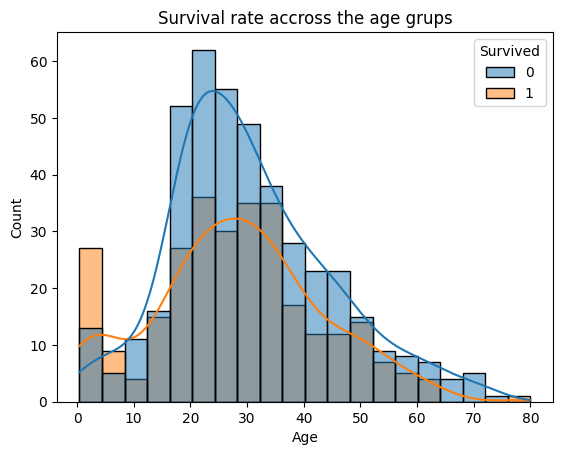

In [233]:
# we need to handle the missing data within the age, i suppose there will be the diffrence in the survival rate accross
# the age grups and the Pclass, and sex thats way i decide to investigate that
sns.histplot(data=train, x="Age", hue="Survived", bins=20, kde=True)
plt.title("Survival rate accross the age grups")
plt.show()

# we can observe that it varies significantly

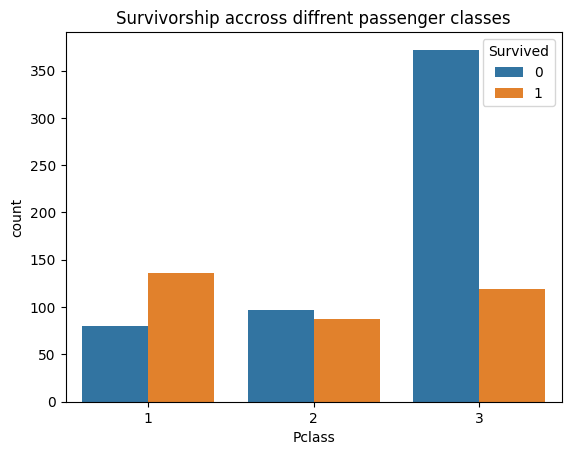

In [234]:
sns.countplot(data=train, x="Pclass", hue="Survived")
plt.title("Survivorship accross diffrent passenger classes")
plt.show()
# we can obesrve that there are significant diffrences

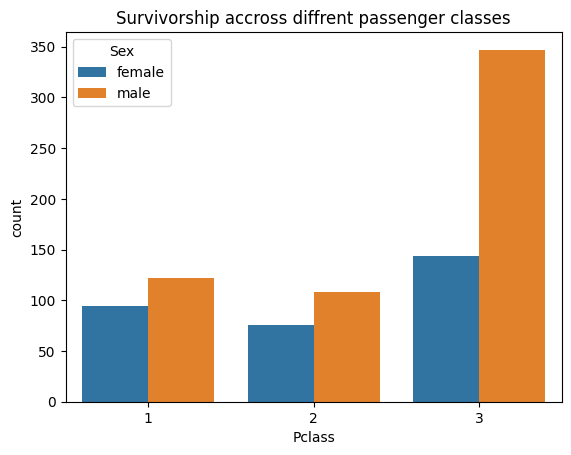

In [235]:
sns.countplot(data=train, x="Pclass", hue="Sex")
plt.title("Survivorship accross diffrent passenger classes")
plt.show()
# we can observe that there is a diffrence in survivorship accross diffrent genders 

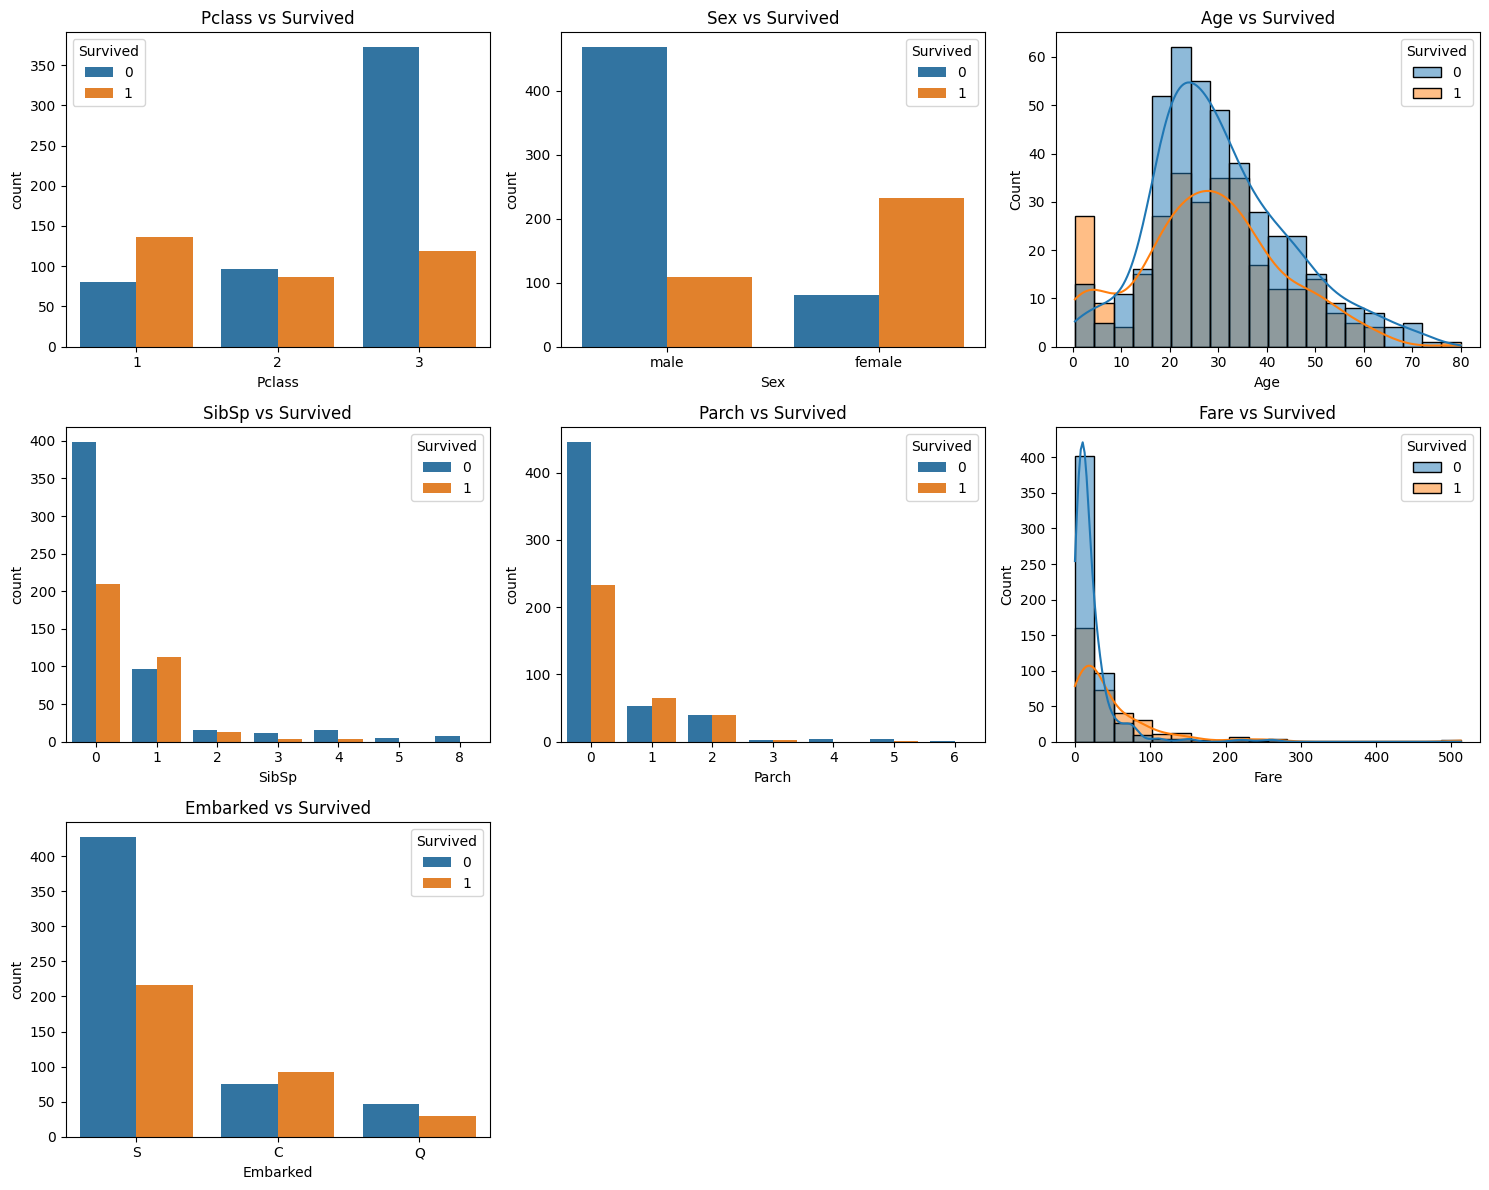

In [236]:

def multiplot(df, column_to_hue, cols_to_exclude=None, nr_of_plots_col=3):
    if cols_to_exclude is None:
        cols_to_exclude = []
    
    nr_of_plots = df.shape[1] - len(cols_to_exclude) - 1
    nr_of_plots_row = math.ceil(nr_of_plots / nr_of_plots_col)

    fig, axes = plt.subplots(nr_of_plots_row, nr_of_plots_col, figsize=(5*nr_of_plots_col, 4*nr_of_plots_row))
    axes = axes.flatten()

    i = 0
    for col in df.columns:
        if col == column_to_hue or col in cols_to_exclude:
            continue

        # Categorical features (object dtype or few unique values)
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            sns.countplot(data=df, x=col, hue=column_to_hue, ax=axes[i])

        # Numeric features
        elif pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(data=df, x=col, hue=column_to_hue, bins=20, kde=True, ax=axes[i])

        axes[i].set_title(f"{col} vs {column_to_hue}")
        i += 1

    # Remove unused subplots
    for j in range(i, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

multiplot(train, "Survived", ["PassengerId", "Ticket"])


In [237]:
# base on that analysis we can quite safly assume that 
# if we will aproximate age base on these 3 factors it will not change our analysis that much
# but first we need to create the bucket for age grups couse if we would aproximete by gruping 
# with age we would most likely get similar age as 2 or 3 samples. Thats is also the same reason why we dont 
# use all categories to aproximate the age. There is not enought data 

def devide_age(df):
    df['AgeGroup'] = pd.cut(
        df['Age'],
        bins=[0, 
            12, 
            20, 
            40,# can use quantiles, but for age it would be kinda weird as we precive difrennces diffrently accross difrent age gups 
            60, 
            df["Age"].max()],
        
        labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']
    )
# we can see that df are mutable and we can pass them too the functions
devide_age(train)
devide_age(test)
print(train.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Embarked AgeGroup  
0         A/5 21171   7.2500        S    Adult  
1          PC 17599  71.2833        C    Adult  
2  STON/O2. 3101282   7.9250        S    Adult  
3            113803  53.1000        S    Adult  
4            373450   8.0500        S    Adult  


In [238]:
# this can be done simpler, transform just accept the functin

# train['Age'] = train.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
def f1(x):
    return x.fillna(x.median())

train['Age'] = train.groupby(['Pclass', 'Sex'])['Age'].transform(f1)
test['Age'] = test.groupby(['Pclass', 'Sex'])['Age'].transform(f1)
devide_age(train)
devide_age(test)
print(train.isna().sum())
# wee need to fill age group once again

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
AgeGroup       0
dtype: int64


In [239]:
# it is nothing out of the ordinary, 
# as there are only two rows i will remove it
print(train[train.isna().any(axis=1)])
# in the test it is simmilar, so it is not a priblem
print(test[test.isna().any(axis=1)])

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  Ticket  Fare  \
61            62         1       1  female  38.0      0      0  113572  80.0   
829          830         1       1  female  62.0      0      0  113572  80.0   

    Embarked AgeGroup  
61       NaN    Adult  
829      NaN   Senior  
     PassengerId  Pclass   Sex   Age  SibSp  Parch Ticket  Fare Embarked  \
152         1044       3  male  60.5      0      0   3701   NaN        S   

    AgeGroup  
152   Senior  


In [240]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [244]:
# Are there duplicates
print(train.duplicated().sum())
print(test.duplicated().sum())


0
0


In [ ]:
# Outliers
def multiboxplot()